<a href="https://githubtocolab.com/alsinmr/CaCO3_archive/blob/main/R1p_fits.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" ></a>

# $R_{1\rho}$ simulations and fits

In [2]:
import sys
if "google.colab" in sys.modules:
    !git clone https://github.com/alsinmr/CaCO3_archive
    %cd CaCO3_archive/

## Example of $R_{1\rho}$ without and with $^1$H spin-diffusion


In [3]:
import SLEEPY as sl
import matplotlib.pyplot as plt

from NMRparameters import deltaCSA,etaCSA,alphaCSA,betaCSA,gammaCSA   #13C CSA
from NMRparameters import delta,beta,gamma                      #H-C dipole 
from NMRparameters import deltaHCSA,alphaHCSA,betaHCSA,gammaHCSA,HCS  #1H CS/CSA
from NMRparameters import deltaHH,betaHH,gammaHH              #H–H dipole

In [4]:
# Build the spin-system
ex=sl.ExpSys(v0H=400,Nucs=['13C','1H','1H'],vr=5000,pwdavg=sl.PowderAvg(q=3))
ex.set_inter('CSA',i=0,delta=deltaCSA,eta=etaCSA,euler=[alphaCSA,betaCSA,gammaCSA])
for k in range(2):
    ex.set_inter('dipole',i0=0,i1=k+1,delta=delta[k],euler=[0,beta[k],gamma[k]])
    ex.set_inter('CSA',i=k+1,delta=deltaHCSA[k],euler=[alphaHCSA[k],betaHCSA[k],gammaHCSA[k]])
    ex.set_inter('CS',i=k+1,ppm=HCS[k])
    for m in range(k+1,2):
        ex.set_inter('dipole',i0=k+1,i1=m+1,delta=deltaHH[k,m],euler=[0,betaHH[k,m],gammaHH[k,m]])


L=ex.Liouvillian()

In [5]:
# Add spin-exchange (k=50000 s-1)
k=50000
_=L.add_SpinEx(i=[1,2],tc=1/(2*k)) #This is the water hopping, which swaps the positions of the first and second spin

In [6]:
# Sequence with 13C spin-lock at 2 kHz
seq=L.Sequence().add_channel('13C',v1=2000)  # Uses default length of 1 rotor period (200 μs)

# Density matrix, initiate on 13Cx, detect on 13Cx
rho=sl.Rho(rho0='13Cx',detect='13Cx')

# Run for 500 steps
rho.DetProp(seq,n=500)

State-space reduction: 64->24


Density Matrix/Detection Operator
rho0: 13Cx
detect[0]: 13Cx
Current time is 100000.000 microseconds
500 time points have been recorded


In [7]:
L.add_relax(Type='SpinDiffusion',i=1,k=5)
L.add_relax(Type='SpinDiffusion',i=2,k=5)

# Density matrix, initiate on 13Cx, detect on 13Cx
rhoSD=sl.Rho(rho0='13Cx',detect='13Cx')

# Run for 500 steps
rhoSD.DetProp(seq,n=500)

State-space reduction: 64->24


Density Matrix/Detection Operator
rho0: 13Cx
detect[0]: 13Cx
Current time is 100000.000 microseconds
500 time points have been recorded


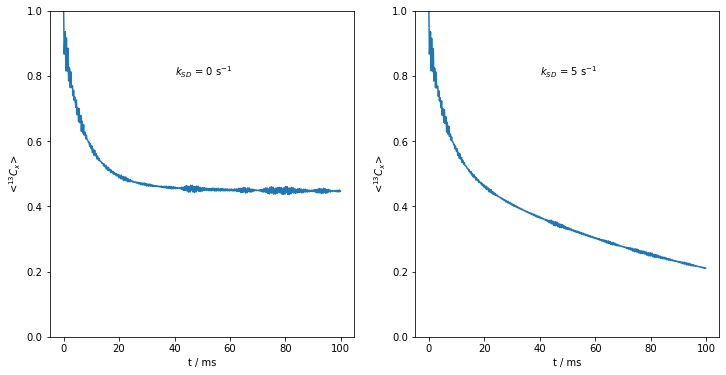

In [8]:
# Plot the results
fig,ax=plt.subplots(1,2)
rho.plot(ax=ax[0])
rhoSD.plot(ax=ax[1])
ax[0].text(40,0.8,r'$k_{SD}$ = 0 s$^{-1}$')
ax[1].text(40,0.8,r'$k_{SD}$ = 5 s$^{-1}$')
fig.set_size_inches([12,6])
for a in ax:a.set_ylim([0,1])

## Fit 3-spin simulations

In [9]:
from fit_3spin import plot_fixed_kSD_3spin

In the following figure, we find the best fit value for $k_{SD}$ (spin-diffusion) and $\tau_c$ (correlation time for water hopping, where $k=1/(2*\tau_c)$. Note that the same value of $k_{SD}$ is used for all simulations

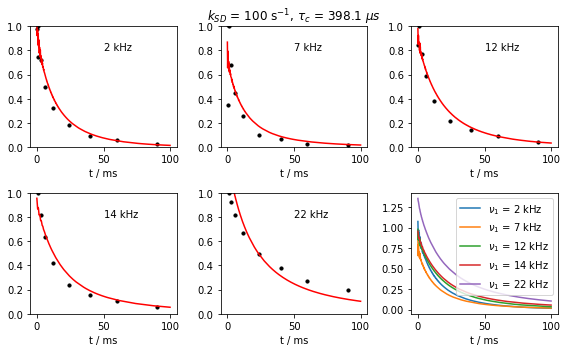

In [10]:
_=plot_fixed_kSD_3spin()

## Fit 5-spin simulations

In [11]:
from fit_5spin import plot_fixed_kSD,plot_variable_kSD

In the following figure, we find the best fit value for $k_{SD}$ (spin-diffusion) and $\tau_c$ (correlation time for water hopping, where $k=1/(2*\tau_c)$. Note that a single value of $k_{SD}$ is used for all simulations

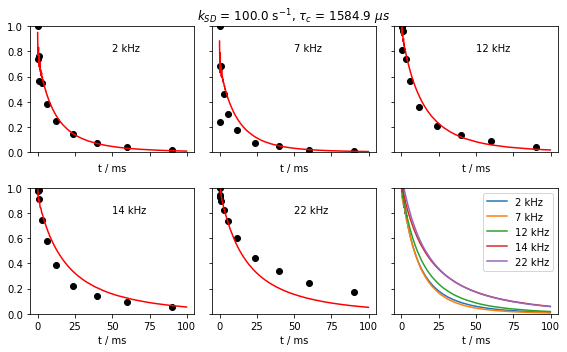

In [12]:
_=plot_fixed_kSD()

However, we note that the spin-diffusion rate may depend on the spin-lock strength on the $^{13}$C, analogous to DARR, so it is also reasonable to fit the experimental data with different values of $k_{SD}$ for each spin-lock strength.

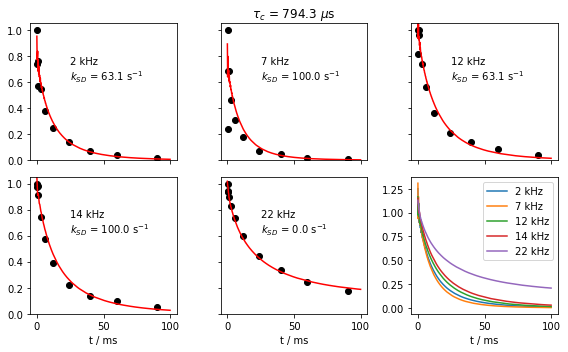

In [13]:
_=plot_variable_kSD()